<a href="https://colab.research.google.com/github/ii200400/Tensorflow_Tutorial/blob/master/08%20-%20Autoencoder/01_Autoencoder(2_1ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 구현하기!

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## 데이터 정의

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

11493376/11490434 [==============================] - 0s 0us/step


## 모델 구성

### 신경망 옵션

In [ ]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100

n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기(이미지 픽셀수)

### 신경망 구성

In [ ]:
# 다음과 같이 이어지는 레이어를 구성한다.
# input -> encode -> decode -> output
# encode 의 출력의 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 크기를 만든다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있다.

def make_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n_hidden, activation=tf.nn.sigmoid, input_shape=(784, )),
    tf.keras.layers.Dense(n_input, activation=tf.nn.sigmoid)
  ])

  return model

model = make_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


### 비용과 최적화 및 정확도 설정

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

### 모델 학습

In [ ]:
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값과 decoder 의 차이를 손실값으로 설정한다.
# 픽셀 당 바이너리 크로스엔트로피 손실을 사용한다.
# 다른 계산법은 사용을 못하거나 너무 크게나와서 훈련이 잘 안된다;
model.fit(x=x_train, 
          y=x_train,
          batch_size=batch_size,
          epochs=training_epoch)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1155 - accuracy: 0.8105
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0846 - accuracy: 0.8148
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0808 - accuracy: 0.8151
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0791 - accuracy: 0.8151
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0779 - accuracy: 0.8152
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0772 - accuracy: 0.8152
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0765 - accuracy: 0.8153
Epoch 8/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0760 - accuracy: 0.8153
Epoch 9/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0756 - accuracy: 0.8153
Epoch 10/20
60

### 모델 테스트

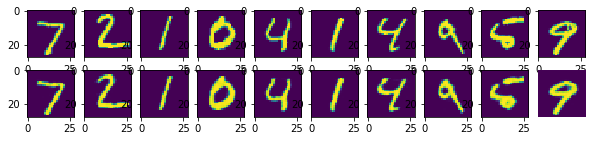

In [ ]:
# 테스트에 쓰일 이미지 선별
sample_size = 10
test_image = x_test[:sample_size]

# 테스트 이미지를 사용해서 모델에 넣어본다.
samples = model(test_image)

# matplot subplots 설정
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

# 각 subplot에 확인하기 쉽게 이미지를 넣어준다.
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    # 이미지 크기를 [784]에서 [28, 28]로 바꾸고 화면에 시각적으로 표현해준다.
    ax[0][i].imshow(np.reshape(test_image[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

## 전체 코드

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

#########
# 옵션 설정
######

learning_rate = 0.01
training_epoch = 20
batch_size = 100

n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######

def make_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n_hidden, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(n_input, activation=tf.nn.softmax)
  ])
  
  return model

model = make_model()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

#########
# 신경망 모델 학습
######

model.fit(x=x_train, 
          y=x_train,
          batch_size=batch_size,
          epochs=training_epoch)

#########
# 결과 확인
# 입력값과 출력값을 matplot을 활용하여 시각적으로 비교
######

sample_size = 10
test_image = x_test[:sample_size]

samples = model(test_image)

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(test_image[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()